# Bowtie antenna synthesis

This example demonstrates how to synthesize a bowtie antenna using the ``BowTieRounded`` class.
It initiates AEDT through PyAEDT, sets up an empty HFSS design, and proceeds to create the antenna.

## Perform required imports

Import the antenna toolkit class and PyAEDT.

In [1]:
import tempfile

In [2]:
import pyaedt

In [3]:
from ansys.aedt.toolkits.antenna.backend.antenna_models.bowtie import BowTieRounded

##  Set AEDT version

Set AEDT version.

In [4]:
aedt_version = "2024.1"

## Set non-graphical mode

Set non-graphical mode.

In [5]:
non_graphical = True

## Create temporary directory

In [6]:
temp_dir = tempfile.TemporaryDirectory(suffix="_ansys")
project_name = pyaedt.generate_unique_project_name(rootname=temp_dir.name, project_name="bowtie_example")

## Create antenna object only for synthesis

Create antenna object.

In [7]:
oantenna1 = BowTieRounded(None)
print(
    "Arm length: {}{} at {}{}".format(
        str(oantenna1.synthesis_parameters.arm_length.value),
        oantenna1.length_unit,
        oantenna1.frequency,
        oantenna1.frequency_unit,
    )
)

Arm length: 0.27cm at 10.0GHz


## Change synthesis frequency

Modify resonance frequency and modify parameters.

In [8]:
oantenna1.frequency = 12.0
print(
    "Arm length: {}{} at {}{}".format(
        str(oantenna1.synthesis_parameters.arm_length.value),
        oantenna1.length_unit,
        oantenna1.frequency,
        oantenna1.frequency_unit,
    )
)

Arm length: 0.22cm at 12.0GHz


## Create an empty HFSS design

Create an empty HFSS design.

In [9]:
app = pyaedt.Hfss(projectname=project_name, specified_version=aedt_version, non_graphical=non_graphical)

PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: StdOut is enabled


PyAEDT INFO: Log on file is enabled


PyAEDT INFO: Log on Desktop Message Manager is enabled


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT outside AEDT with gRPC plugin.


PyAEDT INFO: New AEDT session is starting on gRPC port 58749


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v241\Win64


PyAEDT INFO: Ansoft.ElectronicsDesktop.2024.1 version started with process ID 6756.


PyAEDT INFO: pyaedt v0.9.3


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: AEDT 2024.1.0 Build Date 2023-11-27 22:16:18


PyAEDT INFO: Project bowtie_example has been created.


PyAEDT INFO: No design is present. Inserting a new design.


PyAEDT INFO: Added design 'HFSS_34X' of type HFSS.


PyAEDT INFO: Aedt Objects correctly read


## Create antenna in HFSS

Create antenna object, change frequency synthesis, create antenna, and set up in HFSS.

In [10]:
oantenna1 = BowTieRounded(app)

PyAEDT INFO: Parsing C:/Users/ansys/AppData/Local/Temp/tmp77vild_9_ansys/pyaedt_prj_M8S/bowtie_example.aedt.


PyAEDT INFO: File C:/Users/ansys/AppData/Local/Temp/tmp77vild_9_ansys/pyaedt_prj_M8S/bowtie_example.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.015625476837158203


PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Materials class has been initialized! Elapsed time: 0m 0sec


In [11]:
# Create antenna in HFSS.
oantenna1.model_hfss()

PyAEDT WARNING: Argument `position` is deprecated for method `create_box`; use `origin` instead.


PyAEDT WARNING: Argument `dimensions_list` is deprecated for method `create_box`; use `sizes` instead.


PyAEDT WARNING: Argument `matname` is deprecated for method `create_box`; use `material` instead.


PyAEDT INFO: Parsing design objects. This operation can take time


PyAEDT INFO: 3D Modeler objects parsed. Elapsed time: 0m 0sec


PyAEDT INFO: Union of 2 objects has been executed.


PyAEDT WARNING: Argument `csPlane` is deprecated for method `create_rectangle`; use `orientation` instead.


PyAEDT WARNING: Argument `position` is deprecated for method `create_rectangle`; use `origin` instead.


PyAEDT WARNING: Argument `dimension_list` is deprecated for method `create_rectangle`; use `sizes` instead.


Create antenna setup.

In [12]:
oantenna1.setup_hfss()

PyAEDT INFO: Boundary Perfect E PerfE_65YZ5T has been correctly created.


PyAEDT INFO: Boundary Perfect E PerfE_3IWGTO has been correctly created.


PyAEDT INFO: Boundary AutoIdentify port_Patch_GFUSWN_1 has been correctly created.


True

Change default name.

In [13]:
oantenna1.name = "MyAmazingAntenna"

## Create antenna in HFSS

Create antenna object, change origin parameter in the antenna definition, create antenna, and set up in HFSS.

In [14]:
oantenna2 = BowTieRounded(app, origin=[2, 5, 0], name="MyAntenna")
oantenna2.model_hfss()
oantenna2.setup_hfss()

PyAEDT WARNING: Argument `position` is deprecated for method `create_box`; use `origin` instead.


PyAEDT WARNING: Argument `dimensions_list` is deprecated for method `create_box`; use `sizes` instead.


PyAEDT WARNING: Argument `matname` is deprecated for method `create_box`; use `material` instead.


PyAEDT INFO: Union of 2 objects has been executed.


PyAEDT WARNING: Argument `csPlane` is deprecated for method `create_rectangle`; use `orientation` instead.


PyAEDT WARNING: Argument `position` is deprecated for method `create_rectangle`; use `origin` instead.


PyAEDT WARNING: Argument `dimension_list` is deprecated for method `create_rectangle`; use `sizes` instead.


PyAEDT INFO: Boundary Perfect E PerfE_X7D3RA has been correctly created.


PyAEDT INFO: Boundary Perfect E PerfE_XZORYU has been correctly created.


PyAEDT INFO: Boundary AutoIdentify port_MyAntenna_1 has been correctly created.


True

## Plot HFSS model

Plot geometry with PyVista.

PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


C:\Users\Public\actions-runner\_work\pyaedt-toolkits-antenna\pyaedt-toolkits-antenna\.venv\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


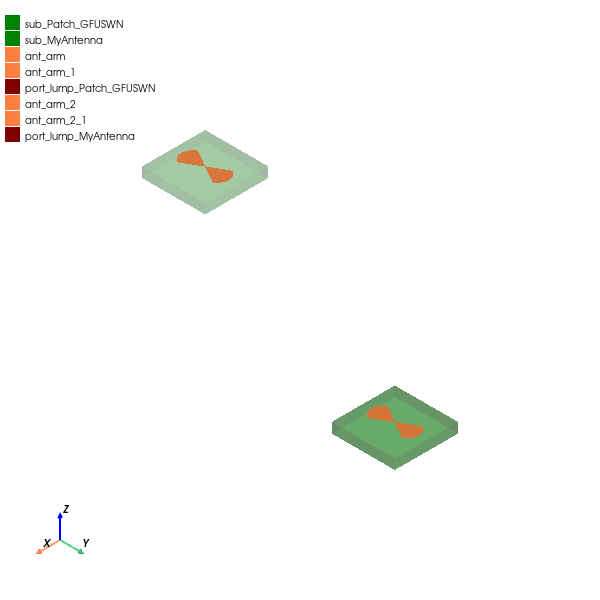

In [15]:
app.plot()

## Release AEDT

Release AEDT.

In [16]:
app.release_desktop(True, True)

PyAEDT INFO: Desktop has been released and closed.


True

## Clean temporary directory

In [17]:
temp_dir.cleanup()